in this file i will try to create a model to predict if a tumor is dangerous for that i will use the breastcancer ds from sklearn and sklearn modules

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

verify the variable in the dataset and clean it if needed

In [2]:
ds = load_breast_cancer()
# print(ds.data[: 2])
# print(ds.feature_names)
df = pd.DataFrame(ds.data, columns=ds.feature_names)
# print(df.head)
df.drop_duplicates()# no duplicate in this dataset
cov_matrix= df.cov() # trouver la matrice de variance covariance pour voir si on peu ce passer de certaine variable
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


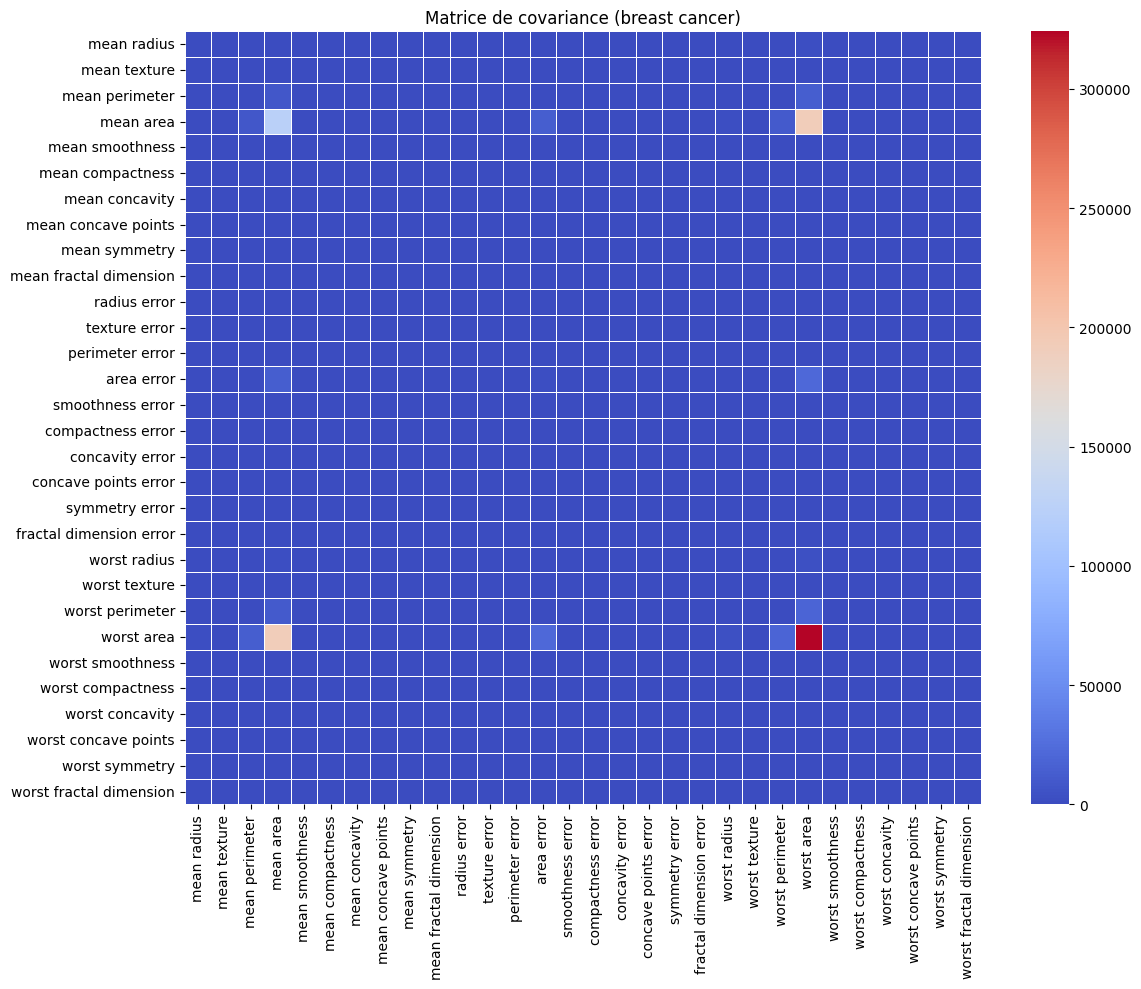

In [3]:
plt.figure(figsize=(12,10))
sns.heatmap(cov_matrix, cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5)
plt.title("Matrice de covariance (breast cancer)")
plt.tight_layout()
plt.show()

the dataset is clean and the variable are not the same 
i can now start the pipeline to chose a model and scale some value like the mean and worst

In [38]:
X, y = ds['data'], ds['target']
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size= 0.2, random_state=42)
# pipe = make_pipeline(QuantileTransformer(),('model', RandomForestClassifier()))


pipe = Pipeline(
    [('scale', QuantileTransformer()),
    ('model', RandomForestClassifier())], #per defaultmodel will be replaced
)
param_grid = [
    {"model": [RandomForestClassifier(random_state=42)],
     "model__n_estimators": [ 20,40,100,135,150],
     "scale": [StandardScaler()]
      },
    {"model": [RandomForestClassifier(random_state=42)],
     "model__n_estimators": [ 20,40,100,135,150],
     "scale": [QuantileTransformer()]
      },
    {"model": [KNeighborsClassifier()],
      "model__n_neighbors": [ 10,20,30,50]},
    {"model": [GradientBoostingClassifier(random_state=42)],
    "model__n_estimators": [ 20,40,100,135]
       },
    {"model": [GradientBoostingClassifier(random_state=42)],
    "model__n_estimators": [20,40,100,135],
    "scale": [StandardScaler()]
       }
]
searchmodel = GridSearchCV(estimator=pipe,param_grid= param_grid, cv= 10,n_jobs=-1)
searchmodel.fit(X_train, y_train)
cvres = pd.DataFrame(searchmodel.cv_results_)
cvres

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (455). n_quantiles is set to n_samples.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__n_estimators,param_scale,param_model__n_neighbors,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033865,0.001530,0.002393,0.000776,RandomForestClassifier(random_state=42),20.0,StandardScaler(),NaN,{'model': RandomForestClassifier(random_state=...,0.978261,...,0.934783,0.978261,0.977778,0.977778,0.933333,0.977778,0.933333,0.969130,0.024576,2
1,0.065735,0.005335,0.002962,0.000899,RandomForestClassifier(random_state=42),40.0,StandardScaler(),NaN,{'model': RandomForestClassifier(random_state=...,1.000000,...,0.934783,0.978261,0.977778,0.977778,0.933333,0.977778,0.933333,0.964783,0.022487,10
2,0.153043,0.004254,0.006243,0.001087,RandomForestClassifier(random_state=42),100.0,StandardScaler(),NaN,{'model': RandomForestClassifier(random_state=...,1.000000,...,0.913043,0.978261,0.977778,0.955556,0.933333,0.977778,0.955556,0.962609,0.024080,15
3,0.206602,0.008430,0.006760,0.001057,RandomForestClassifier(random_state=42),135.0,StandardScaler(),NaN,{'model': RandomForestClassifier(random_state=...,1.000000,...,0.913043,0.978261,0.977778,0.955556,0.955556,0.977778,0.955556,0.964831,0.022230,6
4,0.226701,0.007998,0.007294,0.000829,RandomForestClassifier(random_state=42),150.0,StandardScaler(),NaN,{'model': RandomForestClassifier(random_state=...,1.000000,...,0.913043,0.978261,0.977778,0.955556,0.933333,0.977778,0.955556,0.966957,0.026402,4
5,0.042024,0.001051,0.003052,0.001051,RandomForestClassifier(random_state=42),20.0,QuantileTransformer(),NaN,{'model': RandomForestClassifier(random_state=...,0.978261,...,0.934783,0.978261,0.977778,0.977778,0.933333,0.977778,0.933333,0.969130,0.024576,2
6,0.072185,0.002415,0.004177,0.001049,RandomForestClassifier(random_state=42),40.0,QuantileTransformer(),NaN,{'model': RandomForestClassifier(random_state=...,1.000000,...,0.934783,0.978261,0.977778,0.977778,0.933333,0.977778,0.955556,0.969179,0.022401,1
7,0.168002,0.007207,0.006282,0.000737,RandomForestClassifier(random_state=42),100.0,QuantileTransformer(),NaN,{'model': RandomForestClassifier(random_state=...,1.000000,...,0.934783,0.978261,0.977778,0.955556,0.933333,0.977778,0.955556,0.964783,0.020172,10
8,0.230514,0.016202,0.007685,0.001690,RandomForestClassifier(random_state=42),135.0,QuantileTransformer(),NaN,{'model': RandomForestClassifier(random_state=...,1.000000,...,0.913043,0.978261,0.977778,0.955556,0.955556,0.977778,0.955556,0.964831,0.022230,6
9,0.238590,0.011454,0.007998,0.001151,RandomForestClassifier(random_state=42),150.0,QuantileTransformer(),NaN,{'model': RandomForestClassifier(random_state=...,1.000000,...,0.934783,0.978261,0.977778,0.955556,0.955556,0.977778,0.933333,0.964783,0.020172,10


In [47]:
#looking for the best number of neighbor 
cvneig = cvres.dropna(subset=['param_model__n_neighbors'])
cvneig


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__n_estimators,param_scale,param_model__n_neighbors,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
10,0.010833,0.001554,0.016408,0.028390,KNeighborsClassifier(),NaN,NaN,10.0,"{'model': KNeighborsClassifier(), 'model__n_ne...",0.978261,...,0.891304,0.978261,1.000000,0.977778,0.955556,0.977778,0.977778,0.962802,0.029195,13
11,0.011202,0.001547,0.002227,0.000598,KNeighborsClassifier(),NaN,NaN,20.0,"{'model': KNeighborsClassifier(), 'model__n_ne...",0.978261,...,0.913043,1.000000,1.000000,0.977778,0.955556,0.977778,0.977778,0.964976,0.029455,5
12,0.011047,0.001179,0.002247,0.000787,KNeighborsClassifier(),NaN,NaN,30.0,"{'model': KNeighborsClassifier(), 'model__n_ne...",0.934783,...,0.913043,1.000000,0.977778,0.977778,0.955556,0.977778,0.955556,0.958357,0.028178,19
13,0.011004,0.001967,0.002059,0.000104,KNeighborsClassifier(),NaN,NaN,50.0,"{'model': KNeighborsClassifier(), 'model__n_ne...",0.934783,...,0.891304,1.000000,0.955556,0.955556,0.955556,0.977778,0.955556,0.951739,0.030341,22


result of the cross validation test 

In [40]:
print(searchmodel.best_estimator_)
print(searchmodel.best_score_)
print(searchmodel.best_params_)

Pipeline(steps=[('scale', QuantileTransformer()),
                ('model',
                 RandomForestClassifier(n_estimators=40, random_state=42))])
0.9691787439613526
{'model': RandomForestClassifier(random_state=42), 'model__n_estimators': 40, 'scale': QuantileTransformer()}


the best model in this case was the random forest with 40 estimator

prediction with the model + metrics :

In [ ]:
y_predicted = searchmodel.predict(X_test)
print(accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

0.9649122807017544
[[40  3]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



testing a voting classifier :

In [50]:
piperf = Pipeline(
    [("scale", QuantileTransformer()),
     ("model", RandomForestClassifier(n_estimators=40))]
)
pipegb = Pipeline(
    [("scale", QuantileTransformer()),("model", GradientBoostingClassifier(n_estimators=40))]
)
pipeknn = Pipeline(
    [("scale", QuantileTransformer()),("model", KNeighborsClassifier(n_neighbors=20))]
)

modelvote = VotingClassifier([('randomforest' , piperf),('gradientboost', pipegb),('knn',pipeknn) ],voting="hard")
modelvote.fit(X_train, y_train)


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (455). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (455). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (455). n_quantiles is set to n_samples.
  warnings.warn(


VotingClassifier(estimators=[('randomforest',
                              Pipeline(steps=[('scale', QuantileTransformer()),
                                              ('model',
                                               RandomForestClassifier(n_estimators=40))])),
                             ('gradientboost',
                              Pipeline(steps=[('scale', QuantileTransformer()),
                                              ('model',
                                               GradientBoostingClassifier(n_estimators=40))])),
                             ('knn',
                              Pipeline(steps=[('scale', QuantileTransformer()),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=20))]))])

In [53]:
predictvote = modelvote.predict(X_test)
print(accuracy_score(y_test, predictvote))
print(confusion_matrix(y_test, predictvote))
print(classification_report(y_test, predictvote) )

0.9649122807017544
[[40  3]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

